# Обзор и первичное исследование данных

## Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Заказчик: сеть фитнес-центров "Культурист-датасаентист" 

Цель: провести анализ данных клиентских анкет и подготовить предложения по удержанию клиентов. 

Задачи: 
- спрогнозировать вероятность оттока на уровне следующего месяца для каждого клиента,
- сформировать типичный портрет клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства
- проанализировать основные признаки, наиболее сильно влияющие на отток
- разработать рекомендации по повышению качества работы с клиентами: 
    - выделить целевые группы клиентов,
    - предложить меры по снижению оттока,
    - определить другие особенности взаимодействия с клиентами.
    

## Описание данных

Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. 

Набор данных включает следующие поля:
- 'Churn' — факт оттока в текущем месяце;

Текущие поля в датасете:

Данные клиента за предыдущий до проверки факта оттока месяц:

- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

## Импорт библиотек и данных

In [1]:
# "СТАНДАРТНЫЕ"
import pandas as pd
import numpy as np #библиотека матеметических и числовых операций
import random #библиотека для генерации случайных чисел 

from IPython.display import display

# подавление предупреждений 
import warnings
warnings.filterwarnings('ignore')

# ДАТЫ
import datetime as dt

# "МАТЕМАТИКА"
import math
from scipy import stats as st # для функций norm.ppf и norm.cdf
from math import factorial # факториал 

# РЕГУЛЯРКИ 
import re 

# ГРАФИКИ

import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
%matplotlib inline
# единый стиль графиков
plt.style.use('seaborn-white')

In [2]:
#функция для вывода основных характеристик таблицы 

def research(df):
    
# редактирование названий столбцов (строчные буквы, замена пробелов, удаление пробелов в начале и конце строки)
    df.columns = ((df.columns.str.lower()).str.replace(' ', '_')).str.strip()
    
    print('\033[1m', '1) Названия столбцов', '\033[0m', '\n\n', df.columns)
    print()
      
# вывод части таблицы     
    print('\033[1m', '2) Таблица', '\033[0m')
    display(df.sample(5, random_state = 42))
    print()
    
#общая инфа по таблице    
    print('\033[1m', '3) Общая информация', '\033[0m', '\n')
    df.info()
    print()
    
# описательные статистики для object и int, float
    objects = []
    numbers = []
    dates = []
    for i in df:
        if 'datetime' in str(df[i].dtypes):
            dates.append(i)
        if df[i].dtypes == 'object':
            objects.append(i)    
        if df[i].dtypes == bool:
            _
        if 'int' in str(df[i].dtypes) or 'float' in str(df[i].dtypes):
            numbers.append(i)
    
    if not objects:
        print('\033[1m', '4) Таблица не содержит качественных переменных', '\033[0m')
    else:
        print('\033[1m', '4) Описательные статистики качественных переменных', '\033[0m', '\n')
        display(df[objects].describe())
    if not numbers:
        print('\033[1m', '5) Таблица не содержит количественных переменных', '\033[0m')
    else:
        print('\033[1m', '5) Описательные статистики количественных переменных', '\033[0m', '\n')
        display(df[numbers].describe()) 
    if not dates:
        _
    else:
        display(df[dates].describe())
        
# дубликаты
    if df.duplicated().sum() == 0:
        print('\033[1m', '6) Грубых дубликатов не обнаружено', '\033[0m')
    else:
        print('\033[1m', '6) Количество дубликатов:', '\033[0m', df.duplicated().sum())
        print()
        display(df.duplicated())

In [3]:
df = pd.read_csv('https://.../gym_churn.csv') 

# Изучение и предобработка данных

In [4]:
research(df)

 1) Названия столбцов  

 Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

 2) Таблица 


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
555,1,1,0,0,1,6,1,37,205.631751,5.0,2,1.400690,1.614663,0
3491,0,0,0,0,1,6,0,27,137.370917,6.0,24,0.918920,1.093414,0
527,1,1,0,0,1,1,1,25,41.607768,1.0,1,2.893104,2.813602,0
3925,1,0,0,0,1,1,0,31,9.593524,1.0,14,2.131718,2.147013,0
2989,1,1,0,0,0,1,0,30,275.271537,1.0,4,1.653789,1.738444,0



 3) Общая информация  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB

 4) Табл

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


 6) Грубых дубликатов не обнаружено 


Пропусков и грубых дубликатов в таблице нет. Типы данных соответствуют содержащимся данным. 

# Анализ данных

##  Средние значения признаков

Посмотрим на средние значения признаков для двух групп - тех, кто ушел в отток и тех, кто остался.

In [5]:
df.groupby('churn').mean().T.sort_values(0, ascending=False)

churn,0,1
avg_additional_charges_total,158.445715,115.082899
age,29.976523,26.989632
contract_period,5.747193,1.728558
month_to_end_contract,5.283089,1.662582
lifetime,4.711807,0.990575
avg_class_frequency_current_month,2.027882,1.044546
avg_class_frequency_total,2.024876,1.474995
phone,0.903709,0.902922
near_location,0.873086,0.768143
partner,0.534195,0.355325


Почти не отличаются значения для тех, кто остался и ушел: 
- возраст (средние значения: 30 и 27 лет не выглядит серьезной разницей),
- наличие контактного номера телефона (судя по показателю в 90 %, скорее всего указание номера входит в регистрационную анкету), 
- пол. 

Портрет активного пользователя: 
- возраст около 27 - 30 лет, 
- тратит на доп. услуги до 160 руб.,
- со сроком действия абонемента - до полугода, и уже отходивший полгода,
- посещает клуб стабильно 2 раза в неделю,
- живет или работает недалеко от клуба, 
- с 50 % вероятностью сотрудник компании-партнера, 
Почти половина ходит на групповые занятия, а 35 % пришли в рамках акции "приведи друга". 
Такие данные интуитивно понятны.
 

Кто ушел:
- меньше тратил на дополнительные услуги фитнес-центра,
- срок абонемента истекает через 1-2 месяца, 
- посещали клуб менее месяца, 
- посещали клуб в среднем 1 раз в неделю,
- около 35 % ушедших - сотрудники компаний-партнеров,
26 % ушедших групповые занятия не смогли удержать в клубе, а также 18 % ушли даже после того, как их привел друг! 

## Распределение признаков

Распределение признаков для двух групп

In [6]:
def plots():
    fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12), dpi=80)
    for idx, i in enumerate(df.columns[0:-2]):

        l1 = (df.query('churn == 0')
        .plot(y=i, kind='hist', 
              alpha=0.5, legend=False,  
              ax=axes[idx // 5, idx % 5]))

        l2 = (df.query('churn == 1')
        .plot(y=i, kind='hist', 
              alpha=0.5, legend=False, 
              ax=axes[idx // 5, idx % 5]))

        axes[idx // 5, idx % 5].set_xlabel(i)
        axes[idx // 5, idx % 5].set_ylabel('')


    fig.legend(('0 - flow', '1 - outflow'), loc = 'lower center', frameon=True, edgecolor='grey', fontsize=16)
    fig.suptitle('Распределение признаков для тех, кто ушел (outflow) в отток и тех, кто остался (flow)', 
                 fontsize=18, y=0.93)
    plt.show()

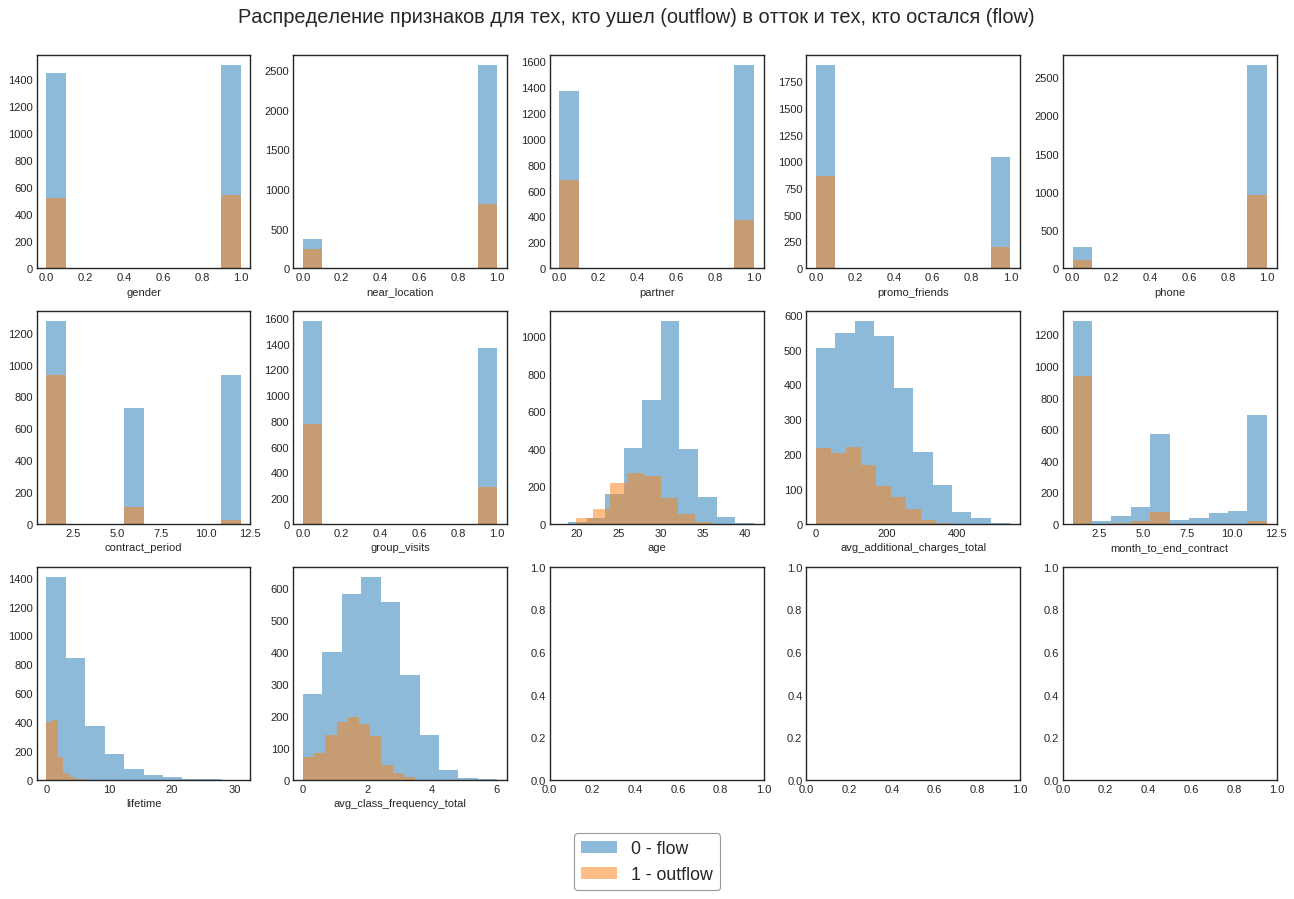

In [7]:
plots()

Сделанные выводы в пункте выше подтверждаются. 
Примерно одинаковое соотношение ушедших и оставшихся клиентов: 
- по гендерному признаку, 
- близости к дому или работе.
Больше уходит:
- тех, кто пришел не по партнерской или "дружественной" программе,  
- те, у кого абонемент менее, чем на 3 месяца или те, кто ходит меньше месяца,
- половина тех, кто не посещает групповые программы.

##  Матрица корреляции

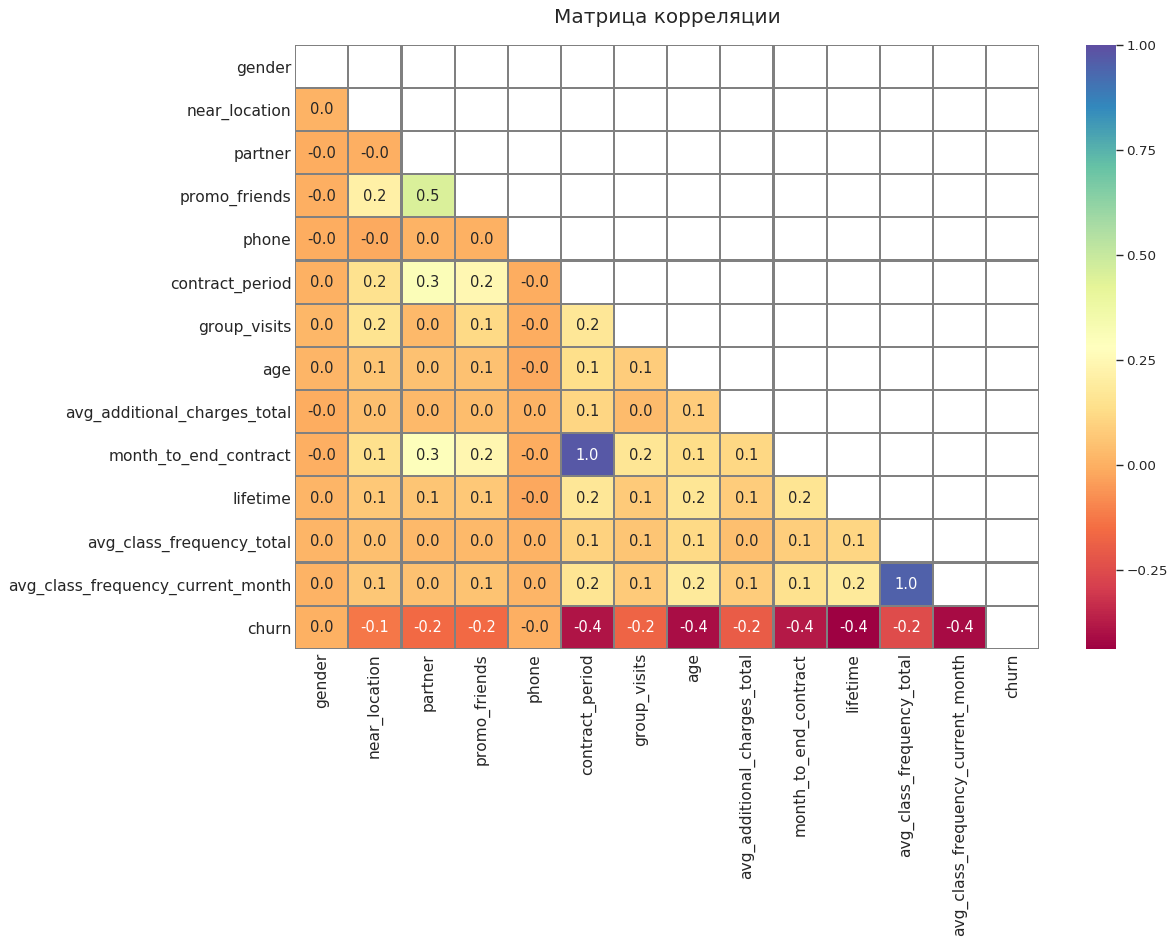

In [8]:
plt.figure(figsize=(15, 10), dpi=80)
plt.title('Матрица корреляции', pad=20, fontsize=18)
matrix = np.triu(df.corr())
sns.set(font_scale=1.1)
sns.heatmap(df.corr(), 
            annot=True, fmt='.1f',  
            cmap= 'Spectral', linewidths=1, linecolor='gray', 
            mask=matrix)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show() 

Признаки с коэффициентом корреляции более 0.8:
- month_to_end_contract vs contract_period,
- avg_class_frequency_current_month vs avg_class_frequency_total.

Удалим по одному из пары признаков, чтобы избежать мультиколлинеарности.

In [9]:
df_clear = df.drop(columns=['contract_period', 'avg_class_frequency_total'])

# Модели прогнозирования оттока

In [10]:
#модели
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

#метрики
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [11]:
# делим на матрицу признаков и целевую переменные
X = df_clear.drop('churn', axis=1)
y = df_clear['churn']

# делим модель на обучающую и валидационную
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# стандартизируем данные
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

## Логистическая регрессия

In [12]:
# задаем алгоритм для модели логистической регрессии
model_lr = LogisticRegression(solver = 'lbfgs', random_state=0)
# обучаем модель 
model_lr.fit(X_train_st, y_train)
# делаем прогноз 
y_pred_lr = model_lr.predict(X_test_st)
# получаем вероятность 
y_proba_lr = model_lr.predict_proba(X_test_st)[:,1]

In [13]:
# создаем датафрейм с признаками и весами
features_lr = pd.DataFrame({
    'features': X_train.columns,
    'coef': model_lr.coef_.ravel().round(3)    
})

# добавляем коэффициенты по модулю
features_lr['coef_abs'] = abs(features_lr['coef'])

features_lr.sort_values('coef_abs', ascending=False)

,features,coef,coef_abs
9,lifetime,-3.924,3.924
10,avg_class_frequency_current_month,-1.335,1.335
8,month_to_end_contract,-1.327,1.327
6,age,-1.109,1.109
7,avg_additional_charges_total,-0.581,0.581
5,group_visits,-0.381,0.381
3,promo_friends,-0.238,0.238
1,near_location,-0.089,0.089
4,phone,-0.087,0.087
2,partner,-0.081,0.081


Наиболее важными модель логистической регрессии посчитала параметры:
- время с момента 1го посещения, 
- средняя частота посещений,
- кол-во месяцев до окончания абонемента, 
- возраст. 

## Случайный лес

In [14]:
# задаем алгоритм для модели случайный лес
model_rf_50 = RandomForestClassifier(n_estimators=50, random_state=0)
# обучаем модель
model_rf_50.fit(X_train_st, y_train)
# делаем прогноз
y_pred_rf_50 = model_rf_50.predict(X_test_st)

In [15]:
# задаем алгоритм для модели случайный лес
model_rf_100 = RandomForestClassifier(n_estimators=100, random_state=0)
# обучаем модель
model_rf_100.fit(X_train_st, y_train)
# делаем прогноз
y_pred_rf_100 = model_rf_100.predict(X_test_st)

In [16]:
# задаем алгоритм для модели случайный лес
model_rf_150 = RandomForestClassifier(n_estimators=150, random_state=0)
# обучаем модель
model_rf_150.fit(X_train_st, y_train)
# делаем прогноз
y_pred_rf_150 = model_rf_150.predict(X_test_st)

In [17]:
# создаем датафрейм с признаками и весами
features_rf = pd.DataFrame({
    'features': X_train.columns,
    'importance_50': model_rf_50.feature_importances_.round(3),
    'importance_100': model_rf_100.feature_importances_.round(3),
    'importance_150': model_rf_150.feature_importances_.round(3)
})

features_rf.sort_values('importance_50', ascending=False)

,features,importance_50,importance_100,importance_150
9,lifetime,0.328,0.322,0.325
10,avg_class_frequency_current_month,0.201,0.210,0.209
6,age,0.139,0.140,0.137
7,avg_additional_charges_total,0.124,0.125,0.124
8,month_to_end_contract,0.121,0.117,0.116
5,group_visits,0.019,0.020,0.020
0,gender,0.016,0.016,0.016
2,partner,0.016,0.016,0.016
3,promo_friends,0.015,0.016,0.016
1,near_location,0.012,0.012,0.012


Наиболее важными модель случайного леса посчитала параметры:
- время с момента 1го посещения, 
- средняя частота посещений,
- возраст, 
- кол-во месяцев до окончания абонемента. 

Отличие от модели регрессии небольшое. 

In [18]:
acc_list = ['accuracy']
precision_list = ['precision']
recall_list = ['recall']
f1_list = ['f1']
for i in [y_pred_lr, y_pred_rf_50, y_pred_rf_100, y_pred_rf_150]:
    acc = round(accuracy_score(y_test, i), 4)
    acc_list.append(acc)
    precision = round(precision_score(y_test, i), 4)
    precision_list.append(precision)
    recall = round(recall_score(y_test, i), 4) 
    recall_list.append(recall)
    f1 = round(f1_score(y_test, i), 4) 
    f1_list.append(f1)
    
metrics = pd.DataFrame(
    [acc_list, precision_list, recall_list, f1_list],
    columns=['metrics', 'logistic_regression', 'random_forest_50', 'random_forest_100', 'random_forest_150']
)

metrics

,metrics,logistic_regression,random_forest_50,random_forest_100,random_forest_150
0,accuracy,0.9050,0.8950,0.9050,0.9025
1,precision,0.7990,0.7908,0.8245,0.8191
2,recall,0.8232,0.7828,0.7828,0.7778
3,f1,0.8109,0.7868,0.8031,0.7979


По метрикам лучшей из случайных лесов показала себя модель с количеством деревьев - 100. 

Для регрессии и случайного леса доля правильных ответов совпала. Обе модели предсказывают хорошо, но стоит учитывать, что данная метрика хороша при условии баланса классов, а у нас классы не сбалансированы, соответственно, для нас эта метрика бесполезна.  

Доля правильных ответов среди целевого класса выше у случайного леса на 0,0255, а вот доля реколл (доля объектов положительного класса из всех объектов положительного класса) выше у регрессии, на 0,0504. 

Сводная метрика F1, учитывающая баланс между классами лучше у регрессии. 
C небольшим отрывом можно назначить лучшей модель логистической регрессии.

# Кластеризация

In [19]:
# стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 

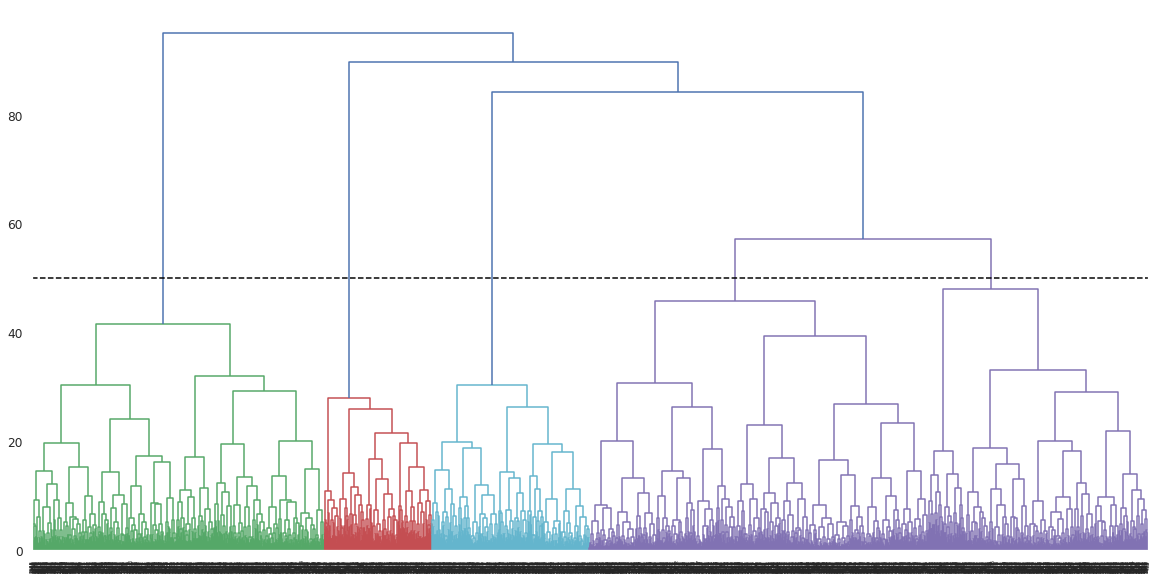

In [20]:
plt.figure(figsize=(20, 10))  
dendrogram(linked, orientation='top')
plt.axhline(y=50, color='black', linestyle='--') 
plt.show() 

Модель выделила 4 класса. 
По условию задания для дальнейшей кластеризации на основании алгоритма K-Means берем 5 классов. Можно обосновать это тем, что фиолетовый класс получился довольно большим, почти половина из всего объема, можно попробовать разбить его на два.

In [21]:
# модель
km = KMeans(n_clusters = 5, random_state=0)

# прогнозируем класстеры 
labels = km.fit_predict(X_sc)

In [22]:
df['cluster_km'] = labels
df_clusters = df.groupby('cluster_km').mean().round(4)
df_clusters

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.4920,0.9940,0.9530,1.0000,0.9060,7.3460,0.5280,29.6330,154.0863,6.7300,4.2870,1.9601,1.9191,0.1080
1,0.4954,0.9987,0.3785,0.0465,0.9031,5.0598,0.0000,30.3426,174.3929,4.6985,5.1660,2.2410,2.2373,0.0465
2,0.5105,1.0000,0.2250,0.1150,0.8999,1.7973,0.1879,26.8010,111.0617,1.7108,1.4227,1.3301,0.9844,0.7404
3,0.5025,0.0000,0.4894,0.0720,0.9133,2.9967,0.2324,28.7005,137.3752,2.8265,3.0278,1.7681,1.5996,0.4010
4,0.5514,0.9988,0.2757,0.0750,0.8972,5.1802,1.0000,30.2757,155.4844,4.7304,4.4994,2.0704,2.0444,0.0895


Для построение графиков распределения признаков по кластерам немного "модернизируем" функцию для построения графиков 

In [23]:
# вариант с постоением сразу всех графиков для всех кластеров
def cluster_plots():
    for cluster in [0, 1, 2, 3, 4]:
        fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12), dpi=80)
        for idx, i in enumerate(df.columns[0:-2]):

            l1 = (df.loc[df.loc[:, 'cluster_km'] == cluster].query('churn == 0')
            .plot(y=i, kind='hist', 
                  alpha=0.5, legend=False,  
                  ax=axes[idx // 5, idx % 5]))

            l2 = (df.loc[df.loc[:, 'cluster_km'] == cluster].query('churn == 1')
            .plot(y=i, kind='hist', 
                  alpha=0.5, legend=False, 
                  ax=axes[idx // 5, idx % 5]))

            axes[idx // 5, idx % 5].set_xlabel(i)
            axes[idx // 5, idx % 5].set_ylabel('')


        fig.legend(('0 - flow', '1 - outflow'), loc = 'lower center', frameon=True, edgecolor='grey', fontsize=16)
        fig.suptitle(
            'Распределение признаков для тех, кто ушел (outflow) в отток и тех, кто остался (flow) для кластера {}'
            .format(cluster), 
                     fontsize=18, y=0.93)
        plt.show()

In [24]:
# вариант с построением графиков по заданному классу
def cluster_plots_2(cluster):
    fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12), dpi=80)
    for idx, i in enumerate(df.columns[0:-2]):

        l1 = (df.loc[df.loc[:, 'cluster_km'] == cluster].query('churn == 0')
        .plot(y=i, kind='hist', 
                alpha=0.5, legend=False,  
                ax=axes[idx // 5, idx % 5]))

        l2 = (df.loc[df.loc[:, 'cluster_km'] == cluster].query('churn == 1')
        .plot(y=i, kind='hist', 
                alpha=0.5, legend=False, 
                ax=axes[idx // 5, idx % 5]))

        axes[idx // 5, idx % 5].set_xlabel(i)
        axes[idx // 5, idx % 5].set_ylabel('')


    fig.legend(('0 - flow', '1 - outflow'), loc = 'lower center', frameon=True, edgecolor='grey', fontsize=16)
    fig.suptitle(
        'Распределение признаков для тех, кто ушел (outflow) в отток и тех, кто остался (flow) для кластера {}'
        .format(cluster), 
            fontsize=18, y=0.93)
    plt.show()

In [25]:
def plots():
    fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12), dpi=80)
    for idx, i in enumerate(df.columns[0:-2]):

        l1 = (df.query('churn == 0')
        .plot(y=i, kind='hist', 
              alpha=0.5, legend=False,  
              ax=axes[idx // 5, idx % 5]))

        l2 = (df.query('churn == 1')
        .plot(y=i, kind='hist', 
              alpha=0.5, legend=False, 
              ax=axes[idx // 5, idx % 5]))

        axes[idx // 5, idx % 5].set_xlabel(i)
        axes[idx // 5, idx % 5].set_ylabel('')


    fig.legend(('0 - flow', '1 - outflow'), loc = 'lower center', frameon=True, edgecolor='grey', fontsize=16)
    fig.suptitle('Распределение признаков для тех, кто ушел (outflow) в отток и тех, кто остался (flow)', 
                 fontsize=18, y=0.93)
    plt.show()

Используем 2ой вариант функции с выводом графиков по заданному классу, чтобы было удобнее писать выводы по каждому классу. 

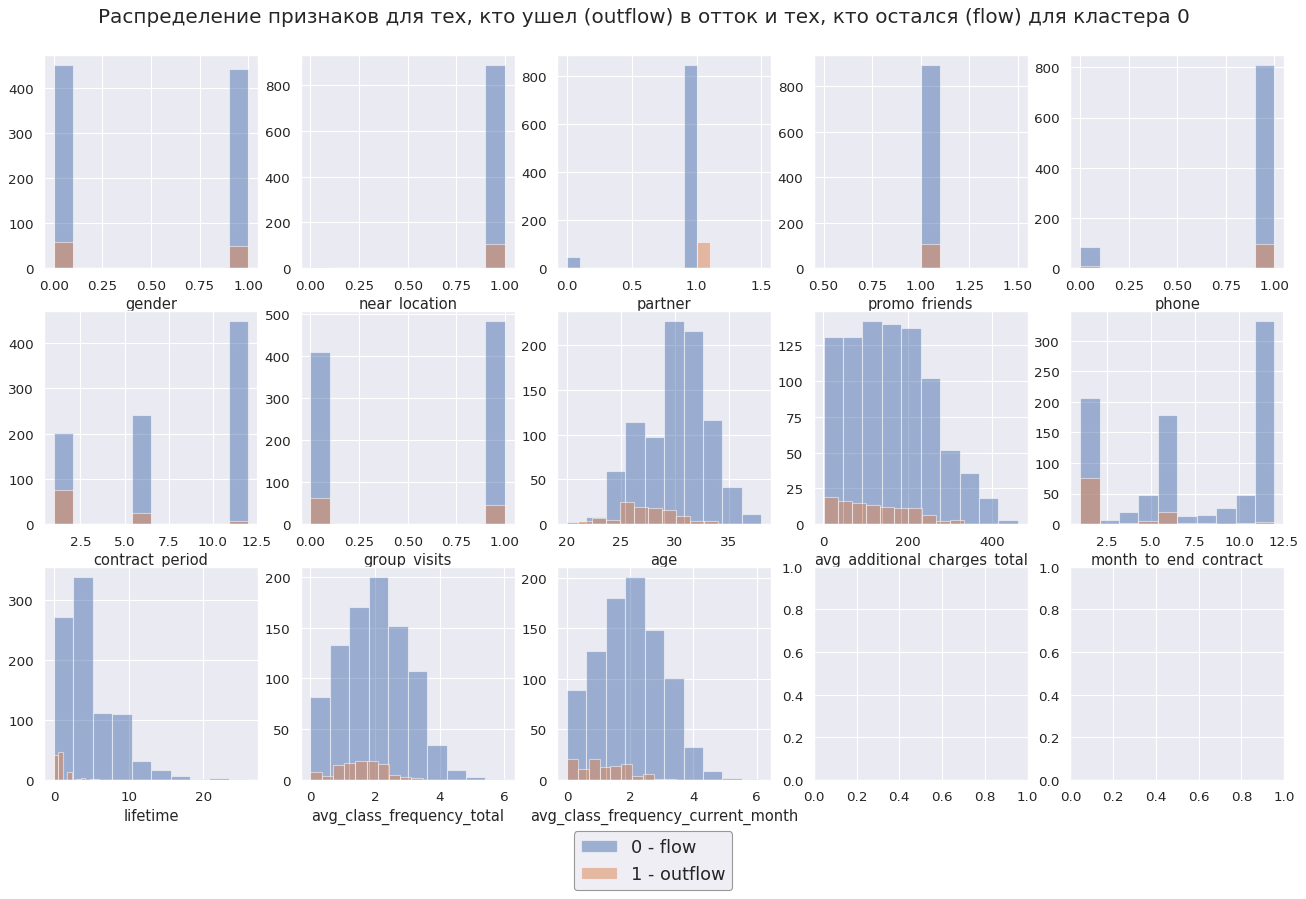

In [27]:
cluster_plots_2(cluster=0)

**Кластер 0 - это новички в нашем клубе.**

Группа тех, кто только что купил абонементы, т.к. большая доля тех, у кого до конца текущего абонемента 12 месяцев, а лайфтайм от 0 до 4 месяцев. 

Их характеристики: 
- многие пришли по партнерской или дружеской программам,
- возраст +/- 30 лет,
- длительный срок абонемента, в основном у всех на год,
- регулярно посещают клуб (2 раза - стабильно). 

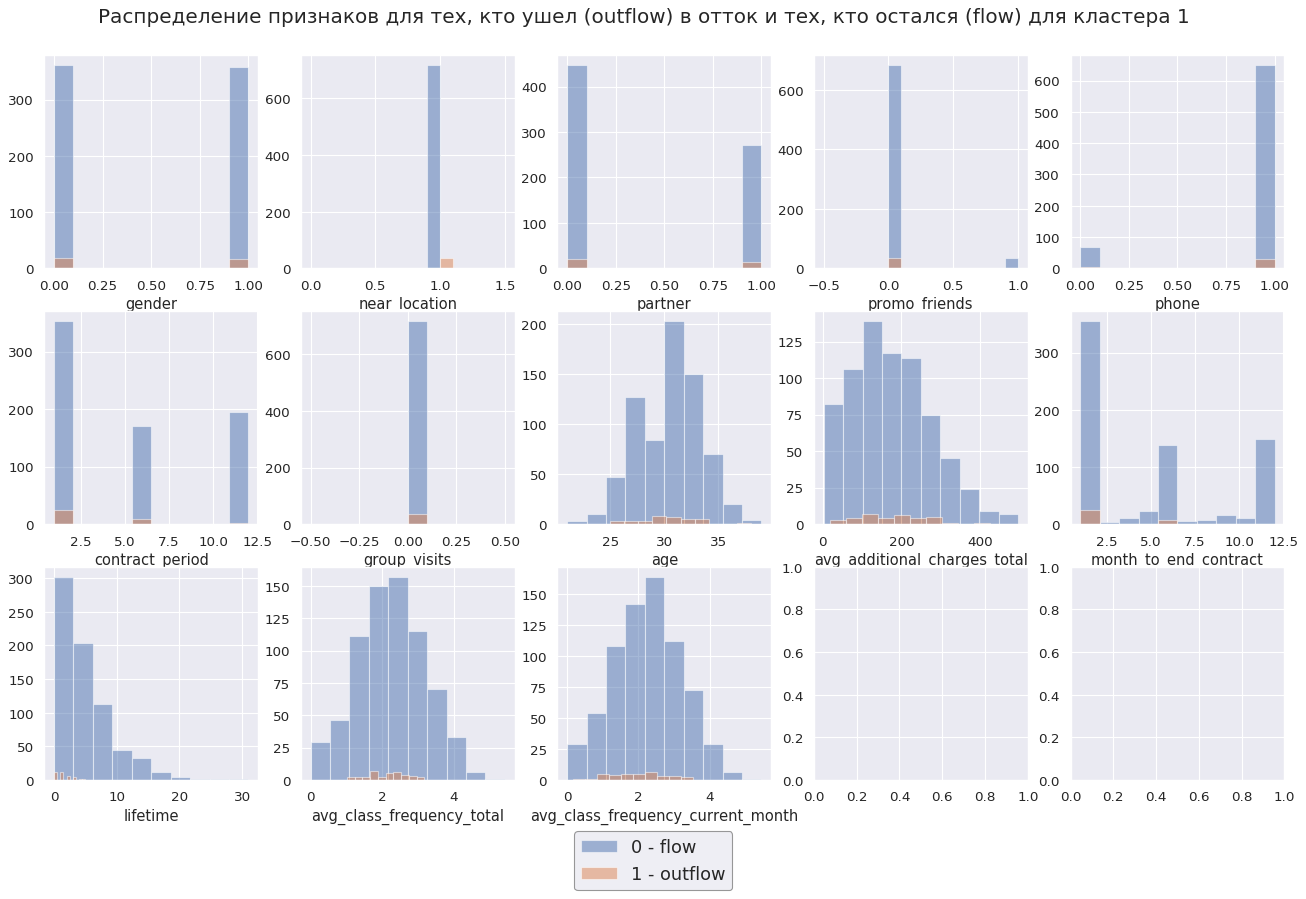

In [28]:
cluster_plots_2(cluster=1)

**Кластер 1 - те, кто меньше всего подвержены оттоку.**
Имеют следующие отличительные характеристики: 
- живут или работают рядом с нашим фитнес-клубом, 
- оставляют свой контактный номер телефона,
- в основном люди в возрасте от 30 до 35 лет,
- пользуются другими услугами фитнес-центра,
- посещают клуб более 2 раз в неделю. 

Срок абонемента при этом не имеет особого значения, много тех, кто купил абонемент на срок до 3 месяцев. 

Посещают и групповые занятия, и тренажеры. 

Получается, что **удобное местоположение играет решающее значение**, что интуитивно понятно, мало кто захочет тратить дополнительное время на "путешествие" до фитнес-клуба до и после работы, даже если тебя позвал в этот клуб друг или есть скидка от компании. 


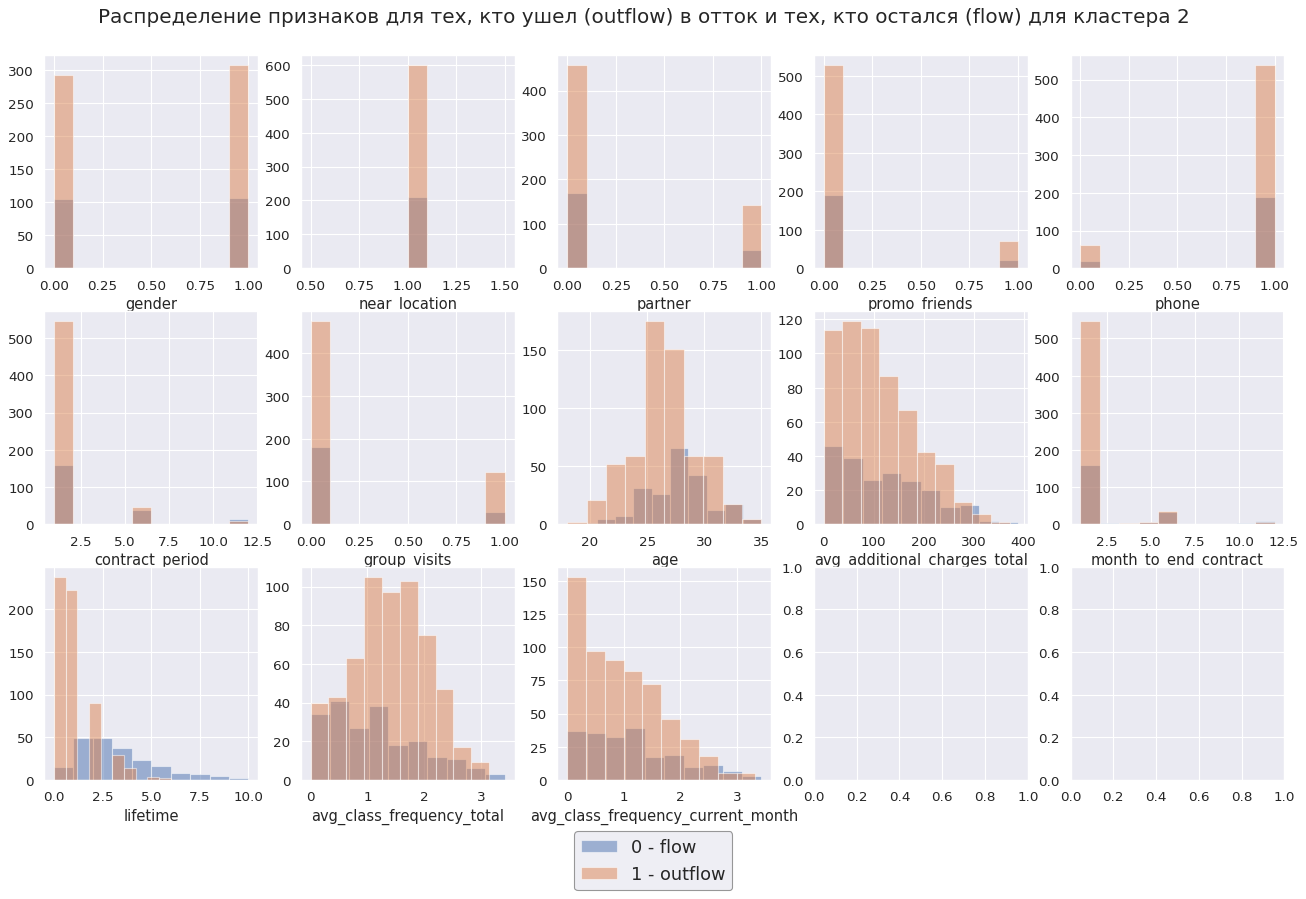

In [29]:
cluster_plots_2(cluster=2)

 **Кластер 2 - те, кто подвержен самому большому оттоку**

Не работает не близость к работе / дому, не программы от партнером и друзей. 
Основные характеристики, которые можно выделить: 
- возраст от 25 до 30 лет, 
- малый лайфтайм и небольшой срок абонемента,
- посещение не более 2 раз в неделю. 
Интересно, что данные кластер также тратится и на дополнительные услуги клуба. 


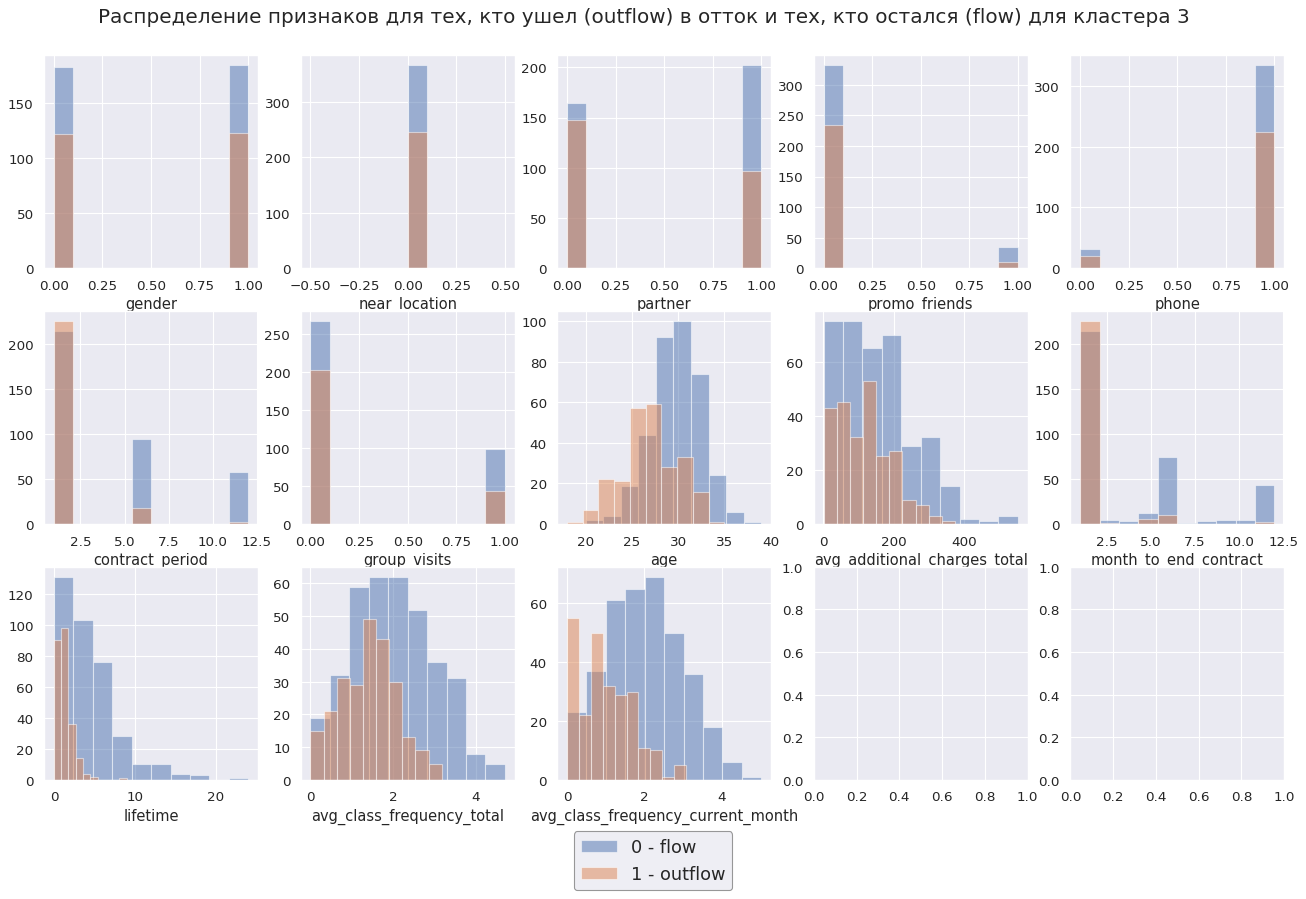

In [30]:
cluster_plots_2(cluster=3)

**Кластер 3 - живущие/работающие далеко от клуба, 2ое место по оттоку** 

Не проживают и не работают рядом с клубом. Видимо этим и объясняется их поведение:
- берут краткосрочные абонементы, но достаточно регулярно, т.к. график лайфтайм похож на график кластера 0 и 2. 
- почти все приходят сами или по партнерской программе, без приглашения друзей.  
Те, кто постарше (30-35) предпочитают остаться и ходят регулярно около 2 раз в неделю, а помоложе (25-30) посещают не регулярно и уходят в поисках лучшего клуба. 

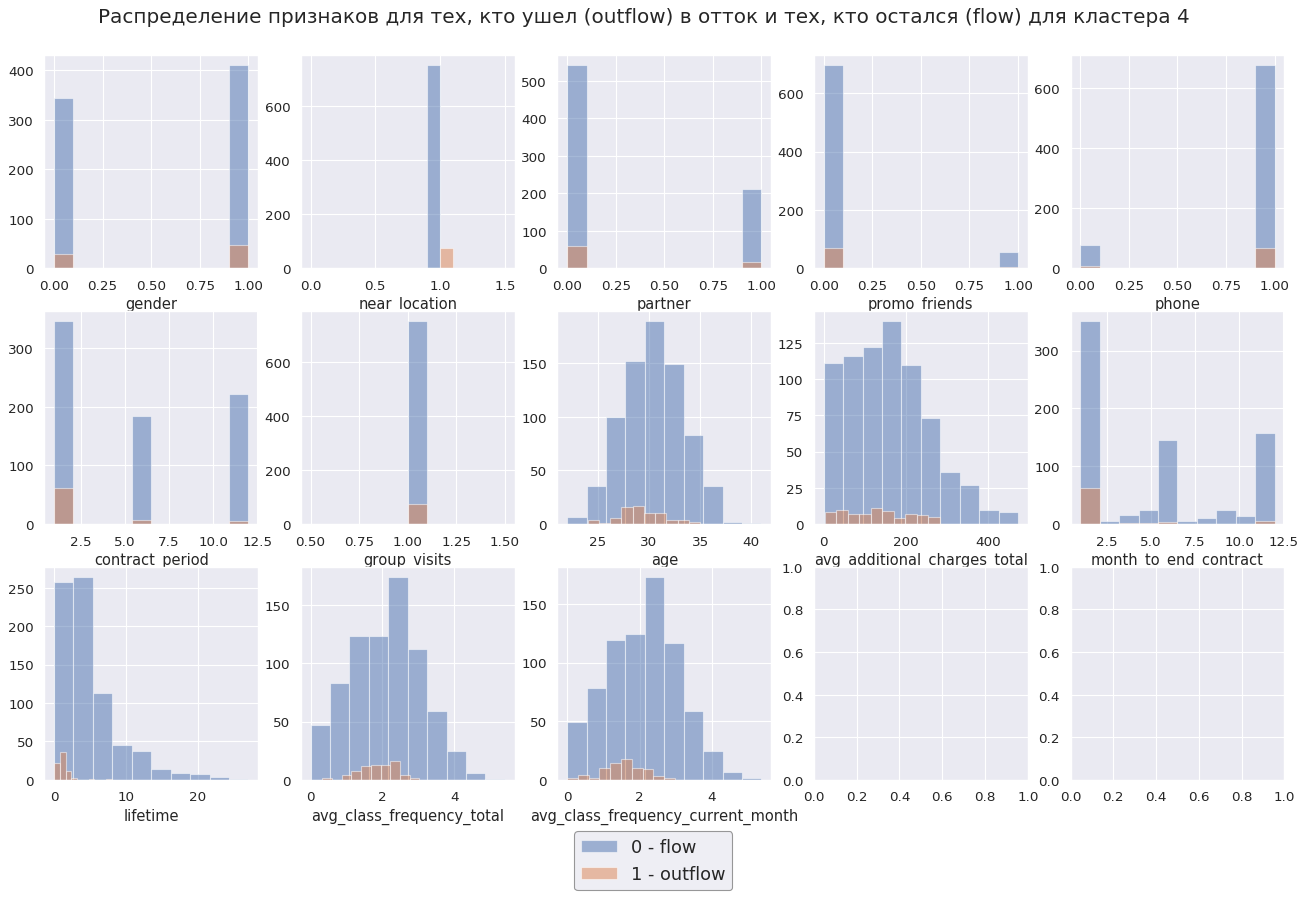

In [31]:
cluster_plots_2(cluster=4)

**Кластер 4 - середнячки**

Живут или работают близко к фитнес-клубу. Опять же в этом случае почти не играет значения "дружеская" или партнерская программы. 
Берут абонемент и на 3 месяца и на год, но уходить начинают те у кого "короткие" абонементы и к окончанию срока абонемента. 

И оценим долю оттока для каждого кластера

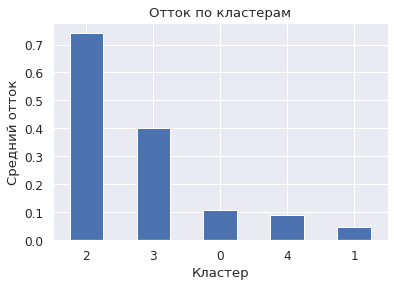

In [32]:
df.groupby('cluster_km').agg({'churn': 'mean'}).sort_values('churn', ascending=False).plot(kind='bar', legend=False)
plt.title('Отток по кластерам')
plt.xticks(rotation=0)
plt.xlabel('Кластер')
plt.ylabel('Средний отток')
plt.show()

Собственно, график оттока подтверждает выводы описанные ранее по детальным графикам признаков для каждого класса. 

# Общие выводы и рекомендации

Модели логистической регрессии и случайного леса основными параметрами оттока определили: 

лайфтайм клиентов, 

среднюю частоту посещения,

кол-во месяцев до окончания абонемента,

возраст. 

Т.е. не бинарные признаки, которых у нас довольно много. В этом свете представляется более удачным выбором для анализа оттока и выработки стратегии по удержанию клиентов использование кластеризации, т.к. можно более адекватно оценить бинарные признаки и сформировать более индивидуальные и, соответственно, более привлекательные предложения для клиентов. 
В результате кластеризации можно сделать следующие выводы: 
- важную роль всё таки играет близость фитнес-центра к дому или работе. Это объяснимо с точки зрения человеческой психологии и современных реалий, когда и на поездку от дома до работы может уходить достаточно много времени, не хочется тратить еще и время на “путешествия” до фитнес-центра. 
- бОльшую приверженность и “прилежность”  в посещении показывают клиенты с длительным сроком абонемента.
- неплохие показатели у партнерской программы и “приведи друга”.

Рекомендации: 
- делать тематические рассылки и спецпредложения для проживающих рядом или для работодателей-партнеров, находящихся рядом с фитнес-клубами 
- делать долгосрочные абонементы более выгодными по цене, чем краткосрочные (что и так прослеживается в реальных фитнес-клубах =) )
- делать рассылки со спецпредложениями для тех, у кого срок долгосрочного абонемента подходит к концу, чтобы стимулировать их выбрать на следующий год опять наш клуб
- изучить более детально кластер 2 и брать фидбек у таких пользователей. Видимо для них наш фитнес-клуб не удовлетворяет каким-то требованиям (не интересные программы или нет бассейна?), которые мы не учитываем, т.к. приходят они к нам ненадолго и даже близость к дому/работе их не останавливает. 
